In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import matplotlib.colors as mcolors

In [27]:
# Lade den Titanic-Datensatz aus Seaborn
titanic = sns.load_dataset("titanic")

# Zeige die ersten 20 Zeilen des Titanic-Datensatzes an
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [28]:
# Berechne die durchschnittliche Überlebensrate für jede Reiseklasse (pclass)
# Gruppiert nach "pclass", berechnet den Mittelwert der 'survived'-Spalte und multipliziert mit 100 für Prozentwerte
pclass_survived = titanic.groupby(["pclass"])["survived"].mean() * 100

# Berechne die durchschnittliche Überlebensrate für jede Fahrpreisstufe (fare)
# Gruppiert nach "fare", berechnet den Mittelwert der "survived"-Spalte und multipliziert mit 100 für Prozentwerte
fare_survived = titanic.groupby(["fare"])["survived"].mean() * 100

In [29]:
# Gruppiere den Titanic-Datensatz nach der Reiseklasse (pclass)
# Berechne den Durchschnitt der Überlebensrate (survived) und des Fahrpreises (fare) für jede Reiseklasse
# Der "agg" Befehl aggregiert (zusammenfasst) die Daten, indem er den Durchschnitt ("mean") für die angegebenen Spalten berechnet
# "reset_index" wird verwendet, um den Index des Ergebnisses zurückzusetzen und die Daten in einem neuen DataFrame zu speichern
df_pclass = titanic.groupby("pclass").agg({"survived": "mean", "fare": "mean"}).reset_index()

# Konvertiere die Überlebensrate in Prozent
df_pclass["survived"] = df_pclass["survived"] * 100

# Runde den Fahrpreis auf zwei Dezimalstellen
df_pclass["fare"] = df_pclass["fare"].round(2)

# Benenne die Spalten auf Deutsch um
df_pclass.columns = ["Reiseklasse", "Durchschnittliche Überlebensrate (%)", "Durchschnittlicher Fahrpreis"]

# Wende den Hintergrund-Gradienten an und formatiere die Anzeige auf zwei Dezimalstellen
df_pclass.style.format({
    "Durchschnittliche Überlebensrate (%)": "{:.2f}",
    "Durchschnittlicher Fahrpreis": "{:.2f}"
}).background_gradient(cmap="Blues")

,Reiseklasse,Durchschnittliche Überlebensrate (%),Durchschnittlicher Fahrpreis
0,1,62.96,84.15
1,2,47.28,20.66
2,3,24.24,13.68


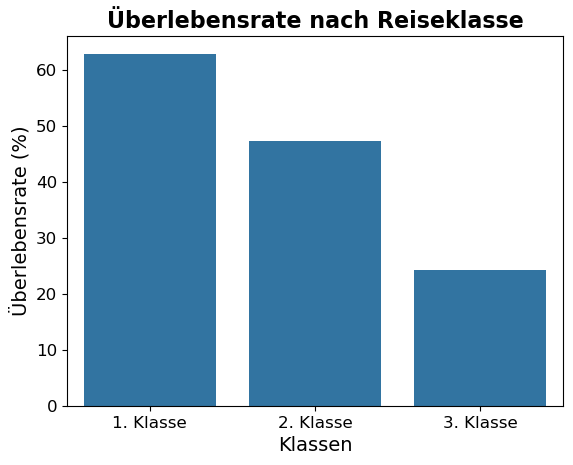

In [30]:
# Erstelle ein Balkendiagramm der Überlebensrate nach Reiseklasse
# "pclass_survived" enthält die Überlebensraten für jede Reiseklasse
sns.barplot(pclass_survived)

# Setze den Titel des Diagramms auf Deutsch, mit Schriftgröße 16 und fettem Gewicht
plt.title("Überlebensrate nach Reiseklasse", fontsize=16, weight="bold")

# Setze die Beschriftung der x-Achse auf Deutsch, mit Schriftgröße 14
plt.xlabel("Klassen", fontsize=14)

# Setze die Beschriftung der y-Achse auf Deutsch, mit Schriftgröße 14
plt.ylabel("Überlebensrate (%)", fontsize=14)

# Setze die x-Achsen-Beschriftungen auf Deutsch und lege die Schriftgröße auf 12 fest
plt.xticks(ticks=[0, 1, 2], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)

# Setze die Schriftgröße der y-Achsen-Beschriftungen auf 12
plt.yticks(fontsize=12)

# Zeige das Diagramm an
plt.show()

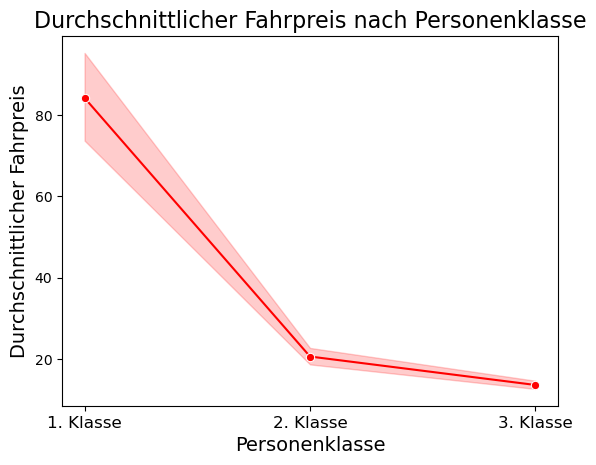

In [31]:
# Erstelle ein Liniendiagramm, das den durchschnittlichen Fahrpreis (fare) nach Personenklasse (pclass) darstellt
# "data=titanic" gibt an, dass die Daten aus dem Titanic-Datensatz verwendet werden
# "color="red"" setzt die Farbe der Linie auf Rot
# "marker="o"" fügt einen Kreis als Marker für jede Datenpunkt hinzu
sns.lineplot(x="pclass", y="fare", data=titanic, color="red", marker="o")

# Setze die x-Achsen-Beschriftungen auf Deutsch mit den Klassenbezeichnungen und lege die Schriftgröße auf 12 fest
plt.xticks(ticks=[1, 2, 3], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)

# Setze die Beschriftung der x-Achse auf Deutsch mit der Schriftgröße 14
plt.xlabel("Personenklasse", fontsize=14)

# Setze die Beschriftung der y-Achse auf Deutsch mit der Schriftgröße 14
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)

# Setze den Titel des Diagramms auf Deutsch mit der Schriftgröße 16
plt.title("Durchschnittlicher Fahrpreis nach Personenklasse", fontsize=16)

# Zeige das Diagramm an
plt.show()

In [32]:
# Aggregiere die Daten nach Geschlecht
df_sex = titanic.groupby("sex").agg({
    "survived": "mean",  # Berechne den Durchschnitt der Überlebensrate
    "fare": "mean"       # Berechne den Durchschnitt des Fahrpreises
}).reset_index()

# Konvertiere die Überlebensrate von einem Wert zwischen 0 und 1 in Prozent (0 bis 100)
df_sex["survived"] = df_sex["survived"] * 100

# Formatieren und stylen des DataFrames
df_sex.style.format({
    "survived": "{:.2f}%",    # Zeige die Überlebensrate in Prozent mit zwei Dezimalstellen an
    "fare": "{:.2f}"         # Zeige den durchschnittlichen Fahrpreis mit zwei Dezimalstellen an
}).background_gradient(cmap="Blues")

,sex,survived,fare
0,female,74.20%,44.48
1,male,18.89%,25.52


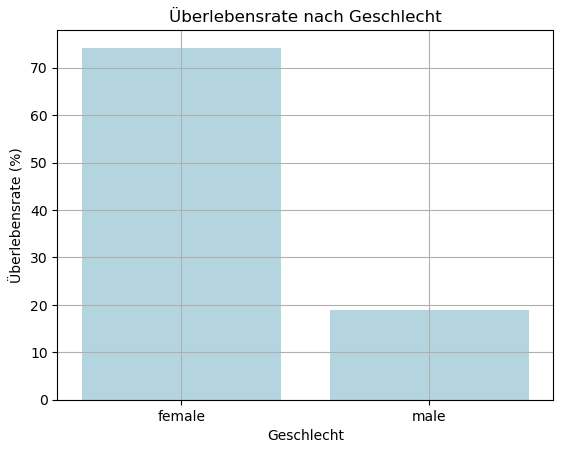

In [33]:
# Erstelle ein Balkendiagramm mit 'seaborn'
# 'x="sex"' gibt an, dass die x-Achse die Spalte 'sex' verwendet, die die Geschlechtskategorien enthält
# 'y="survived"' gibt an, dass die y-Achse die Spalte 'survived' verwendet, die die Überlebensraten enthält
# 'data=df_sex' gibt an, dass die Daten aus dem DataFrame 'df_sex' entnommen werden
# 'color="lightblue"' setzt die Farbe der Balken auf Hellblau
sns.barplot(x="sex", y="survived", data=df_sex, color="lightblue")

# Setze die Beschriftung der x-Achse auf "Geschlecht" und passe die Schriftgröße an
plt.xlabel("Geschlecht")

# Setze die Beschriftung der y-Achse auf "Überlebensrate (%)" und passe die Schriftgröße an
plt.ylabel("Überlebensrate (%)")

# Setze den Titel des Diagramms auf "Überlebensrate nach Geschlecht" und passe die Schriftgröße an
plt.title("Überlebensrate nach Geschlecht")

# Aktiviere das Gitternetz im Hintergrund des Diagramms, um die Lesbarkeit der Werte zu erleichtern
plt.grid(True)

# Zeige das Diagramm an
plt.show()

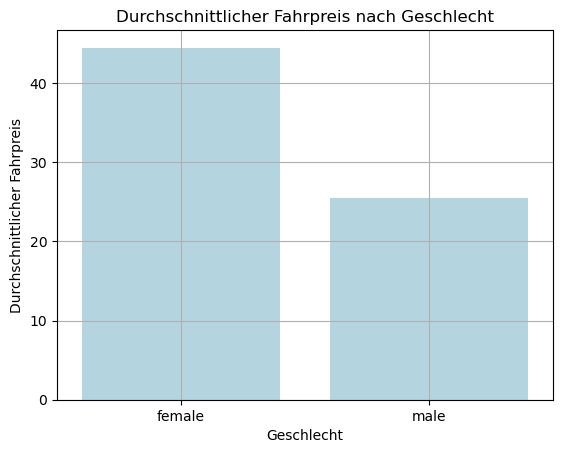

In [34]:
# Erstelle ein Balkendiagramm, das den durchschnittlichen Fahrpreis (fare) nach Geschlecht (sex) zeigt
# "x="sex"" legt die x-Achse auf das Geschlecht fest
# "y="fare"" legt die y-Achse auf den durchschnittlichen Fahrpreis fest
# "data=df_sex" gibt an, dass die Daten aus dem DataFrame df_sex verwendet werden
# "color="red"" setzt die Farbe der Balken auf Rot
sns.barplot(x="sex", y="fare", data=df_sex, color="lightblue")

# Setze die Beschriftung der x-Achse auf Deutsch, "Geschlecht"
plt.xlabel("Geschlecht")

# Setze die Beschriftung der y-Achse auf Deutsch, "Durchschnittlicher Fahrpreis"
plt.ylabel("Durchschnittlicher Fahrpreis")

# Setze den Titel des Diagramms auf Deutsch, "Durchschnittlicher Fahrpreis nach Geschlecht"
plt.title("Durchschnittlicher Fahrpreis nach Geschlecht")

# Zeige ein Gitter im Diagramm an, um die Werte leichter ablesen zu können
plt.grid(True)

# Zeige das Diagramm an
plt.show()

In [40]:
# Definiere die Altersgruppen (bins) und ihre Labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]

# Erstelle eine neue Spalte im DataFrame für Altersgruppen basierend auf den definierten Bins und Labels
titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)

# Gruppiere den Titanic-Datensatz nach Altersgruppen (age_group)
# Berechne den Durchschnitt der Überlebensrate (survived) und des Fahrpreises (fare) für jede Altersgruppe
df_age = titanic.groupby("age_group", observed=True).agg({
    "survived": "mean",  # Durchschnittliche Überlebensrate
    "fare": "mean"       # Durchschnittlicher Fahrpreis
}).reset_index()

# Konvertiere die Überlebensrate in Prozent
df_age["survived"] = df_age["survived"] * 100

# Runde den Fahrpreis auf zwei Dezimalstellen
df_age["fare"] = df_age["fare"].round(2)

# Wende die Formatierung auf den DataFrame an, um die Werte auf zwei Dezimalstellen zu runden
# "format" wird verwendet, um die Anzeige der Zahlen in den angegebenen Spalten auf zwei Dezimalstellen zu beschränken
# "background_gradient(cmap="Blues")" wird verwendet, um einen Hintergrund-Gradienten in Blautönen anzuwenden
df_age.style.format({
    "survived": "{:.2f}%",  # Formatierung der Überlebensrate auf zwei Dezimalstellen als Prozent
    "fare": "{:.2f}"        # Formatierung des Fahrpreises auf zwei Dezimalstellen
}).background_gradient(cmap="Blues")

,age_group,survived,fare
0,0-10,59.38%,30.43
1,10-20,38.26%,29.53
2,20-30,36.52%,28.31
3,30-40,44.52%,42.50
4,40-50,38.37%,41.16
5,50-60,40.48%,44.77
6,60-70,23.53%,45.91
7,70-80,20.00%,25.94


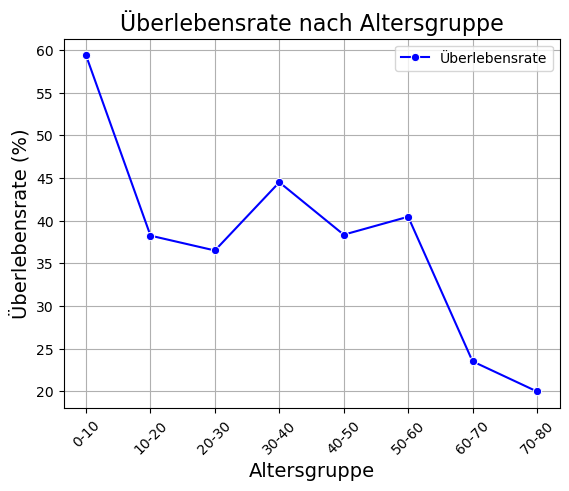

In [41]:
# Erstelle ein Liniendiagramm, das die Überlebensrate nach Altersgruppe zeigt
sns.lineplot(x="age_group", y="survived", data=df_age, color="blue", marker="o", label="Überlebensrate")

# Setze die Beschriftung der x-Achse auf "Altersgruppe" und passe die Schriftgröße an
plt.xlabel("Altersgruppe", fontsize=14)

# Setze die Beschriftung der y-Achse auf "Überlebensrate (%)" und passe die Schriftgröße an
plt.ylabel("Überlebensrate (%)", fontsize=14)

# Setze den Titel des Diagramms auf "Überlebensrate nach Altersgruppe" und passe die Schriftgröße an
plt.title("Überlebensrate nach Altersgruppe", fontsize=16)

# Drehe die x-Achsen-Beschriftungen um 45 Grad, um die Lesbarkeit zu verbessern
plt.xticks(rotation=45)

# Aktiviere das Gitternetz im Hintergrund des Diagramms
plt.grid(True)

# Zeige die Legende des Diagramms an
plt.legend()

# Zeige das Diagramm an
plt.show()

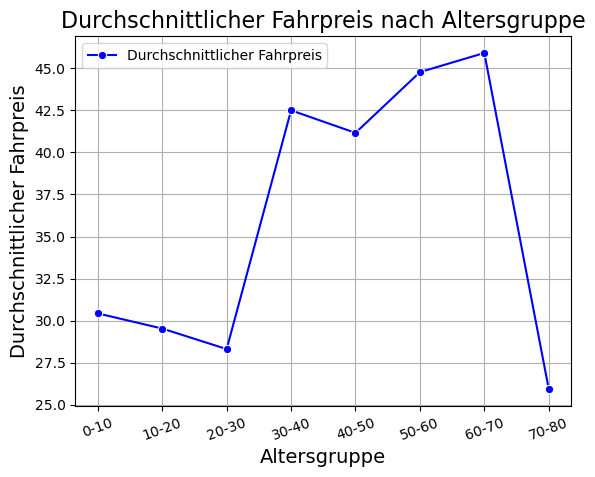

In [42]:
# Erstelle ein Liniendiagramm, das den durchschnittlichen Fahrpreis nach Altersgruppe zeigt
sns.lineplot(x="age_group", y="fare", data=df_age, color="blue", marker="o", label="Durchschnittlicher Fahrpreis")

# Setze die Beschriftung der x-Achse auf "Altersgruppe" und passe die Schriftgröße an
plt.xlabel("Altersgruppe", fontsize=14)

# Setze die Beschriftung der y-Achse auf "Durchschnittlicher Fahrpreis" und passe die Schriftgröße an
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)

# Setze den Titel des Diagramms auf "Durchschnittlicher Fahrpreis nach Altersgruppe" und passe die Schriftgröße an
plt.title("Durchschnittlicher Fahrpreis nach Altersgruppe", fontsize=16)

# Drehe die x-Achsen-Beschriftungen um 45 Grad, um die Lesbarkeit zu verbessern
plt.xticks(rotation=20)

# Aktiviere das Gitternetz im Hintergrund des Diagramms
plt.grid(True)

# Zeige die Legende des Diagramms an
plt.legend()

# Zeige das Diagramm an
plt.show()

In [52]:
# Gruppiere den Titanic-Datensatz nach Abfahrtshafen (embark_town)
# Berechne den Durchschnitt der Überlebensrate (survived) und des Fahrpreises (fare) für jeden Abfahrtshafen
# "agg" aggregiert (fasst zusammen) die Daten, indem es den Durchschnitt ("mean") für die angegebenen Spalten berechnet
# "reset_index" wird verwendet, um den Index des Ergebnisses zurückzusetzen und die Daten in einem neuen DataFrame zu speichern
df_embarked = titanic.groupby("embark_town").agg({
    "survived": "mean",  # Durchschnittliche Überlebensrate
    "fare": "mean"       # Durchschnittlicher Fahrpreis
}).reset_index()

# Wende den Hintergrund-Gradienten in Blautönen auf den DataFrame an, um die Werte visuell hervorzuheben
df_embarked.style.format({
    "survived": "{:.2f}%",  # Formatierung der Überlebensrate auf zwei Dezimalstellen als Prozent
    "fare": "{:.2f}"        # Formatierung des Fahrpreises auf zwei Dezimalstellen
}).background_gradient(cmap="Blues")

,embark_town,survived,fare
0,Cherbourg,0.55%,59.95
1,Queenstown,0.39%,13.28
2,Southampton,0.34%,27.08


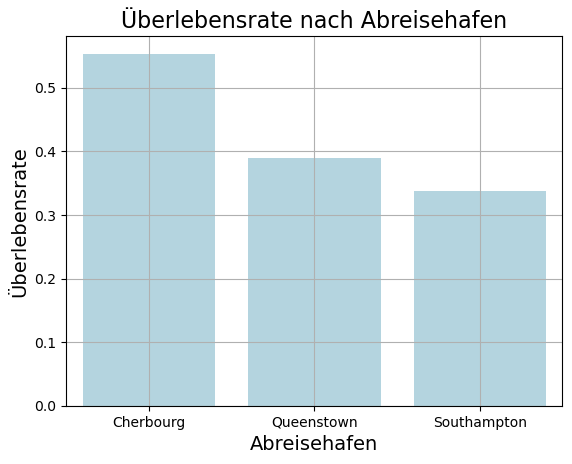

In [44]:
# Erstelle ein Balkendiagramm, das die Überlebensrate nach Abreisehafen zeigt
sns.barplot(x="embark_town", y="survived", data=df_embarked, color="lightblue")

# Setze die Beschriftung der x-Achse auf "Abreisehafen" und passe die Schriftgröße an
plt.xlabel("Abreisehafen", fontsize=14)

# Setze die Beschriftung der y-Achse auf "Überlebensrate" und passe die Schriftgröße an
plt.ylabel("Überlebensrate", fontsize=14)

# Setze den Titel des Diagramms auf "Überlebensrate nach Abreisehafen" und passe die Schriftgröße an
plt.title("Überlebensrate nach Abreisehafen", fontsize=16)

# Drehe die x-Achsen-Beschriftungen um 45 Grad, um die Lesbarkeit zu verbessern
plt.xticks(rotation=0)

# Aktiviere das Gitternetz im Hintergrund des Diagramms
plt.grid(True)

# Zeige das Diagramm an
plt.show()

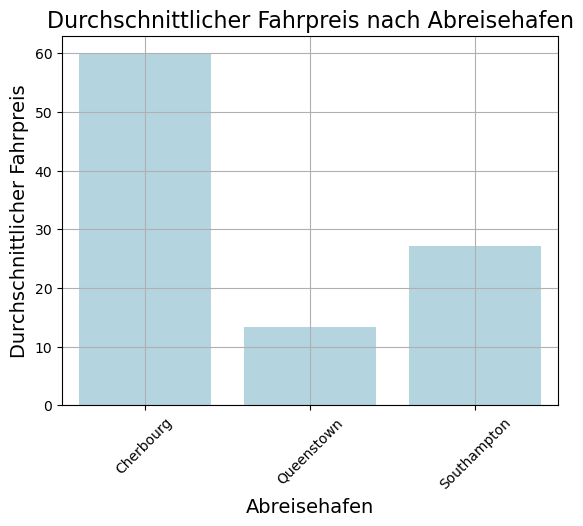

In [46]:
# Erstelle ein Balkendiagramm, das den durchschnittlichen Fahrpreis nach Abreisehafen zeigt
sns.barplot(x="embark_town", y="fare", data=df_embarked, color="lightblue")

# Setze die Beschriftung der x-Achse auf "Abreisehafen" und passe die Schriftgröße an
plt.xlabel("Abreisehafen", fontsize=14)

# Setze die Beschriftung der y-Achse auf "Durchschnittlicher Fahrpreis" und passe die Schriftgröße an
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)

# Setze den Titel des Diagramms auf "Durchschnittlicher Fahrpreis nach Abreisehafen" und passe die Schriftgröße an
plt.title("Durchschnittlicher Fahrpreis nach Abreisehafen", fontsize=16)

# Drehe die x-Achsen-Beschriftungen um 45 Grad, um die Lesbarkeit der Beschriftungen zu verbessern
plt.xticks(rotation=45)

# Aktiviere das Gitternetz im Hintergrund des Diagramms, um die Lesbarkeit der Balken zu verbessern
plt.grid(True)

# Zeige das Diagramm an
plt.show()

In [51]:
# Berechne die Familiengröße für jeden Passagier
titanic["family_size"] = 1 + titanic["sibsp"] + titanic["parch"]

# Gruppiere den Titanic-Datensatz nach Familiengröße (family_size)
# Berechne den Durchschnitt der Überlebensrate (survived) und des Fahrpreises (fare) für jede Familiengröße
df_family_size = titanic.groupby("family_size").agg({
    "survived": "mean",  # Durchschnittliche Überlebensrate
    "fare": "mean"       # Durchschnittlicher Fahrpreis
}).reset_index()

# Konvertiere die Überlebensrate in Prozent
df_family_size["survived"] = df_family_size["survived"] * 100

# Wende einen Hintergrund-Gradienten in Blautönen auf den DataFrame an
df_family_size.style.format({
    "survived": "{:.2f}%",  # Formatierung der Überlebensrate auf zwei Dezimalstellen als Prozent
    "fare": "{:.2f}"        # Formatierung des Fahrpreises auf zwei Dezimalstellen
}).background_gradient(cmap="Blues")

,family_size,survived,fare
0,1,30.35%,21.24
1,2,55.28%,49.89
2,3,57.84%,39.69
3,4,72.41%,54.86
4,5,20.00%,58.09
5,6,13.64%,73.72
6,7,33.33%,29.37
7,8,0.00%,46.90
8,11,0.00%,69.55


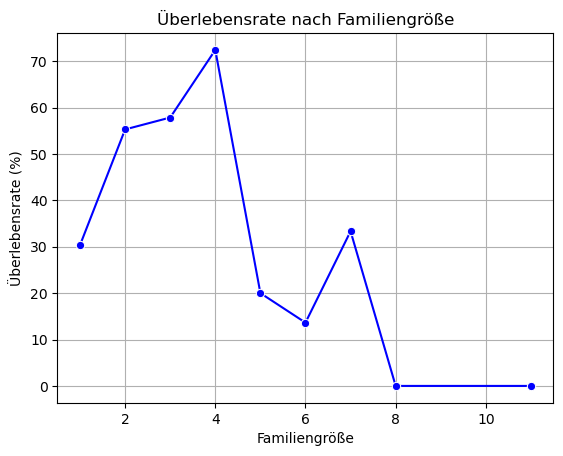

In [53]:
# Erstelle ein Liniendiagramm, das die Überlebensrate nach Familiengröße zeigt
sns.lineplot(x="family_size", y="survived", data=df_family_size, color="blue", marker="o")

# Setze die Beschriftung der x-Achse auf "Familiengröße"
plt.xlabel("Familiengröße")

# Setze die Beschriftung der y-Achse auf "Überlebensrate (%)"
plt.ylabel("Überlebensrate (%)")

# Setze den Titel des Diagramms auf "Überlebensrate nach Familiengröße"
plt.title("Überlebensrate nach Familiengröße")

# Aktiviere das Gitternetz im Hintergrund des Diagramms
plt.grid(True)

# Zeige das Diagramm an
plt.show()

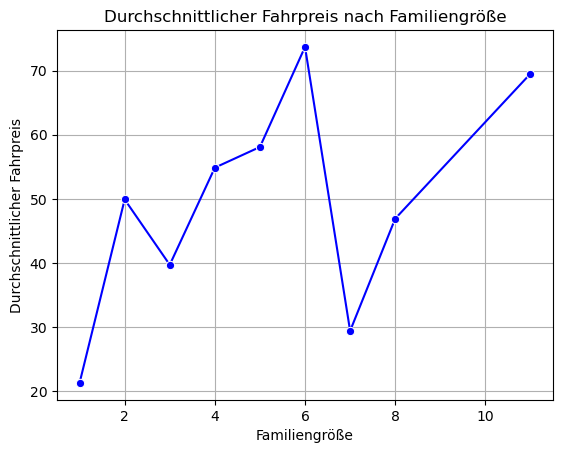

In [58]:
# Erstelle ein Diagramm, das den durchschnittlichen Fahrpreis nach Familiengröße zeigt
sns.lineplot(x="family_size", y="fare", data=df_family_size, color="blue", marker="o")

# Setze die Beschriftung der x-Achse auf "Familiengröße"
plt.xlabel("Familiengröße")

# Setze die Beschriftung der y-Achse auf "Durchschnittlicher Fahrpreis"
plt.ylabel("Durchschnittlicher Fahrpreis")

# Setze den Titel des Diagramms auf "Durchschnittlicher Fahrpreis nach Familiengröße"
plt.title("Durchschnittlicher Fahrpreis nach Familiengröße")

# Aktiviere das Gitternetz im Hintergrund des Diagramms
plt.grid(True)

# Zeige das Diagramm an
plt.show()

In [59]:
def plot_titanic_analysis(variable):
    # Gruppiere den Titanic-Datensatz nach der angegebenen Variable
    # Berechne den Durchschnitt der Überlebensrate (survived) und des Fahrpreises (fare) für jede Gruppe
    # "reset_index()" wird verwendet, um den Index zurückzusetzen und die Daten in einem neuen DataFrame zu speichern
    df_grouped = titanic.groupby(variable).agg({"survived": "mean", "fare": "mean"}).reset_index()
    
    # Konvertiere die Überlebensrate in Prozent
    df_grouped["survived"] = df_grouped["survived"] * 100

    # Erstelle eine Figur mit der Größe 14x6 Zoll
    plt.figure(figsize=(14, 6))

    # Erstelle das erste Subplot für die Überlebensrate
    plt.subplot(1, 2, 1)
    sns.barplot(x=variable, y="survived", data=df_grouped, color="lightblue")
    plt.title(f"Überlebensrate nach {variable.capitalize()}")
    plt.xlabel(variable.capitalize())
    plt.ylabel("Überlebensrate (%)")

    # Erstelle das zweite Subplot für den durchschnittlichen Fahrpreis
    plt.subplot(1, 2, 2)
    sns.barplot(x=variable, y="fare", data=df_grouped, color="red")
    plt.title(f"Durchschnittlicher Fahrpreis nach {variable.capitalize()}")
    plt.xlabel(variable.capitalize())
    plt.ylabel("Durchschnittlicher Fahrpreis")

    # Optimiere das Layout der Plots
    plt.tight_layout()
    
    # Zeige das Diagramm an
    plt.show()

# Erstelle interaktive Widgets für die Auswahl der Variable
# Ermöglicht es dem Benutzer, verschiedene Variablen auszuwählen und die Diagramme entsprechend zu aktualisieren
interact(plot_titanic_analysis, variable=["pclass", "sex", "embarked", "family_size", "age_group"])

interactive(children=(Dropdown(description='variable', options=('pclass', 'sex', 'embarked', 'family_size', 'a…

<function __main__.plot_titanic_analysis(variable)>

## Personenklasse (Pclass)
Die Analyse zeigt signifikante Unterschiede in der Überlebensrate und dem durchschnittlichen Fahrpreis in Abhängigkeit von der Personenklasse. Passagiere der 1. Klasse wiesen eine deutlich höhere Überlebensrate auf als diejenigen der 2. und 3. Klasse. Dies reflektiert wahrscheinlich die privilegierte Position der 1.-Klassen-Passagiere, die besseren Zugang zu Rettungsbooten und höhere Komfortstandards genossen. Der durchschnittliche Fahrpreis in der 1. Klasse war erheblich höher, was die luxuriösen Bedingungen und den exklusiven Service dieser Klasse widerspiegelt. Die Diskrepanz zwischen den Klassen unterstreicht die soziale Ungleichheit und die damit verbundenen Unterschiede in der Notfallbehandlung.

## Geschlecht (Sex)
Die Untersuchung der Überlebensraten nach Geschlecht zeigt, dass Frauen eine höhere Überlebensrate aufwiesen als Männer. Diese Ergebnisse stimmen mit historischen Berichten überein, die besagen, dass bei der Evakuierung von Frauen und Kindern Vorrang eingeräumt wurde. Im Vergleich zu den Überlebensraten sind die Unterschiede im durchschnittlichen Fahrpreis zwischen den Geschlechtern weniger ausgeprägt. Dies deutet darauf hin, dass Preisunterschiede hauptsächlich durch Faktoren wie Buchungsklasse und Reisezweck und nicht durch das Geschlecht der Passagiere beeinflusst wurden.

## Alter (Age)
Die Analyse des Alters der Passagiere zeigt, dass jüngere Passagiere tendenziell höhere Überlebensraten aufwiesen. Kinder und junge Erwachsene hatten im Vergleich zu älteren Passagieren eine bessere Überlebenschance. Dies könnte auf verschiedene Faktoren wie körperliche Fitness und die Fähigkeit zurückzuführen sein, schneller Zugang zu Rettungsbooten zu erhalten. Die durchschnittlichen Fahrpreise variieren je nach Altersgruppe, was durch unterschiedliche Buchungsklassen und Reisebedingungen erklärt werden kann.

## Abreisehafen (Embarked)
Der Abreisehafen der Passagiere hat sowohl die Überlebensrate als auch den Fahrpreis beeinflusst. Unterschiede in den Überlebensraten zwischen den Abreisehäfen könnten durch unterschiedliche Rettungsprotokolle oder die spezifische Verteilung der Passagiere erklärt werden. Auch die Fahrpreise variieren in Abhängigkeit vom Abreisehafen, was möglicherweise auf die Verfügbarkeit und die Nachfrage an den verschiedenen Abreiseorten zurückzuführen ist.

## Familiengröße (Family Size)
Die Familiengröße der Passagiere zeigt interessante Muster hinsichtlich der Überlebenschancen und der Fahrpreise. Passagiere, die alleine reisten, hatten möglicherweise unterschiedliche Überlebenschancen im Vergleich zu Familienreisenden. Größere Familien könnten bei der Evakuierung mit spezifischen Herausforderungen konfrontiert gewesen sein, was sich negativ auf die Überlebensrate ausgewirkt haben könnte. Zudem zeigt die Analyse, dass der durchschnittliche Fahrpreis mit der Familiengröße tendenziell steigt, da größere Gruppen oft höhere Kosten für ihre Plätze aufwenden mussten.

## Zusammenfassung
Insgesamt bietet die Analyse des Titanic-Datensatzes umfassende Einblicke in die sozialen und ökonomischen Unterschiede unter den Passagieren. Die Ergebnisse verdeutlichen sowohl die damaligen gesellschaftlichen Bedingungen als auch die komplexen Herausforderungen, denen die Passagiere gegenüberstanden. Diese Erkenntnisse tragen dazu bei, die historische Katastrophe besser zu verstehen und die Faktoren zu identifizieren, die das Überleben und die Kosten der Reise beeinflussten.